In [1]:
using Surrogates
using Plots

In [2]:
function f(x1, x2)
    a=1;
    b=5.1/(4*π^2);
    c=5/π;
    r=6;
    s=10;
    t=1/(8π);
    a*(x2-b*x1+c*x1-r)^2+s*(1-t)*cos(x1)+s -250 * 2^(-((x1-5)^2 + (x2-12)^2) / 5) - x1
end

function noisy_f(x_vec)
    print
    f(x_vec[1], x_vec[2]) + randn()*(1+randn())
end

noisy_f (generic function with 1 method)

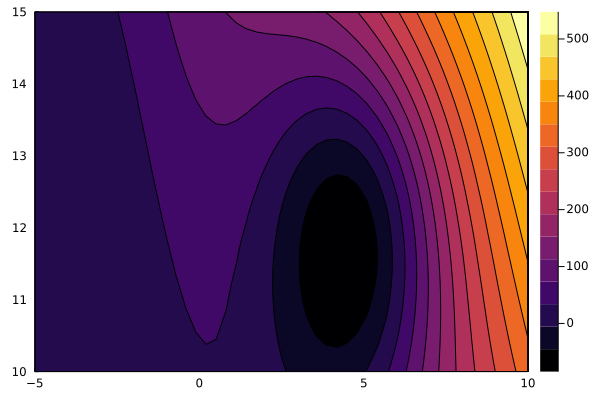

In [3]:
# just for plotting the contours
n_samples = 50
x_bound = [-5.0, 10.0]
y_bound = [10.0, 15.0]

x = range(x_bound..., length=n_samples)
y = range(y_bound..., length=n_samples)
z = @. f(x', y)
contour(x, y, z; fill=true)

This is where the optimization happens.
1. Generate some test data for the surrogate model of the function we want to optimize (in this example, `noisy_f`)
2. Build a Gaussian Process Regression that allows us to estimate predicted output values and their uncertainties. (This is called the acquisition model -- it helps us to choose the next data point to use after each iteration)
3. Run the optimization procedure.

In [4]:
n_samples = 50
lower_bound = [-5.0, 0.0]
upper_bound = [10.0, 15.0]

xys = sample(n_samples, lower_bound, upper_bound, SobolSample())
zs = noisy_f.(xys);

In [5]:
kriging_surrogate = Kriging(xys, zs, lower_bound, upper_bound, p=[1.9, 1.9])

(::Kriging{Vector{Tuple{Float64, Float64}}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Float64, Vector{Float64}, Float64, Matrix{Float64}}) (generic function with 2 methods)

In [6]:
# the optimization
optimum = surrogate_optimize(noisy_f, SRBF(), lower_bound, upper_bound, kriging_surrogate, SobolSample(), maxiters=10)

Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Kriging.
Adding a sample that already exists, cannot build Krigin

((4.329364898483827, 11.57419570799293), -88.0272845363017)

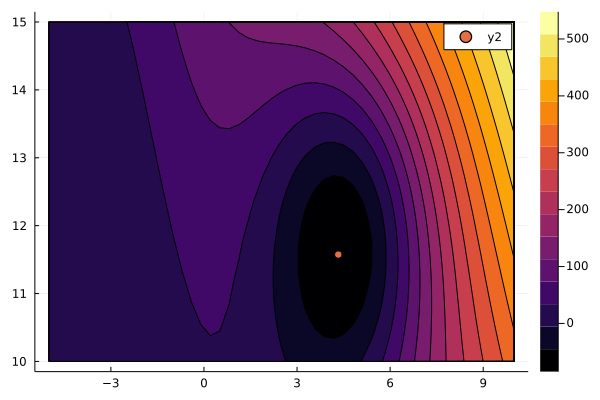

In [7]:
scatter!([optimum[1][1]], [optimum[1][2]])